### Extract timeseries from SWAN output files

In [27]:
import scipy.io as sio
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# Define variables

par = 'cart_mdir'
par_file = 'hsig wave vector (mean direction).mat'
par_grid = 'wave grid.mat'

filepath_swan = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ouputs_swan\2015_csiro_era5'


filepath_buoy1 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\pnboia'
buoy1_file = r'itajai.csv'
buoy1_loc = 'Itajaí (PNBOIA)'
buoy1_lat = -27.00
buoy1_lon = -47.00
dtb1 = '''Período:
Abr/09 - Out/09
Fev/11 - Out/12
Fev/13 - Out/13
Nov/14 - Dez/15
Abr/16 - Jul/17'''

filepath_buoy2 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\pnboia'
buoy2_file = r'riogrande.csv'
buoy2_loc = 'Rio Grande (PNBOIA)'
buoy2_lat = -31.50
buoy2_lon = -49.50
dtb2 = '''Período:
Abr/09 - Fev/11
Fev/11 - Jul/11
Jan/12 - Jan/13
Jun/13 - Dez/18'''

filepath_buoy3 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\redeondas\florianopolis'
buoy3_loc = 'Florianópolis (Rede Ondas)'
buoy3_lat = -27.50
buoy3_lon = -48.00
dtb3 = '''Período:
Mar/02 - Set/03
Mai/04 - Jun/04'''

filepath_buoy4 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\redeondas\tramandai'
buoy4_loc = 'Tramandaí (Rede Ondas)'
buoy4_lat = -30.00
buoy4_lon = -49.50
dtb4 = '''Período:
Nov/06 - Set/07
Dez/13 - Mar/14
Jun/14 - Mai/15
Jan/16 - Jul/16'''

buoy_locs = [buoy1_loc, buoy2_loc, 
             buoy3_loc, buoy4_loc]

coords_tpar = [[buoy1_lon, buoy1_lat],
               [buoy2_lon, buoy2_lat],
               [buoy3_lon, buoy3_lat],
               [buoy4_lon, buoy4_lat]]

coords_tpar = np.array(coords_tpar)


In [15]:
%cd $filepath_swan

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ouputs_swan\2005_csiro_era5


In [16]:
# Load grid daa to extract indexes
swan_grid = sio.loadmat(par_grid)

# Check how the data is organised
pd.DataFrame(swan_grid['data'][0])

,X,Y,XUnits,YUnits,Time,Name,Units
0,"[[-55.647029876708984, -55.634552001953125, -5...","[[-34.284217834472656, -34.26407241821289, -34...",[deg],[deg],[],[wave grid],[]


In [17]:
pd.DataFrame(swan_grid['data'][0][0][0]).head(5)

,0,1,2,3,4,5,6,7,8,9,...,369,370,371,372,373,374,375,376,377,378
0,-55.647030,-55.634552,-55.622059,-55.609528,-55.596943,-55.584282,-55.571533,-55.558670,-55.545685,-55.532551,...,-49.608479,-49.594425,-49.580441,-49.566521,-49.552654,-49.538834,-49.525047,-49.511288,-49.497543,-49.483810
1,-55.615288,-55.602798,-55.590286,-55.577744,-55.565144,-55.552471,-55.539707,-55.526836,-55.513840,-55.500698,...,-49.556419,-49.541824,-49.527393,-49.513092,-49.498898,-49.484787,-49.470753,-49.456772,-49.442833,-49.428913
2,-55.583481,-55.570976,-55.558453,-55.545891,-55.533276,-55.520592,-55.507816,-55.494934,-55.481922,-55.468773,...,-49.504395,-49.489269,-49.474396,-49.459717,-49.445194,-49.430801,-49.416519,-49.402321,-49.388184,-49.374077
3,-55.551548,-55.539024,-55.526482,-55.513905,-55.501278,-55.488575,-55.475784,-55.462887,-55.449867,-55.436707,...,-49.452442,-49.436798,-49.421490,-49.406448,-49.391605,-49.376938,-49.362408,-49.347996,-49.333664,-49.319370
4,-55.519417,-55.506874,-55.494316,-55.481720,-55.469074,-55.456356,-55.443550,-55.430637,-55.417599,-55.404427,...,-49.400593,-49.384457,-49.368729,-49.353333,-49.338181,-49.323238,-49.308479,-49.293858,-49.279335,-49.264858


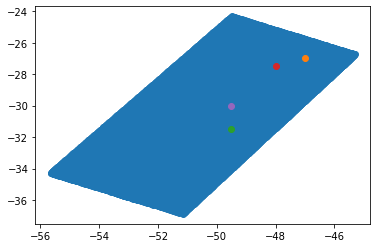

In [18]:
# Plot the grid with the points to be extracted

xx = swan_grid['data'][0][0][0]
yy = swan_grid['data'][0][0][1]


plt.scatter(xx, yy)
plt.scatter(buoy1_lon, buoy1_lat)
plt.scatter(buoy2_lon, buoy2_lat)
plt.scatter(buoy3_lon, buoy3_lat)
plt.scatter(buoy4_lon, buoy4_lat)
plt.show()

In [19]:
# Create the coordinate grid
coordinate_grid = np.array([xx, yy])
coordinate_grid = coordinate_grid.transpose(1,2,0)

In [20]:
# Create list with the indexes of buoys

buoy_indexes = []
for loc in range(len(coords_tpar)):
    xx_index = np.logical_and(xx < coords_tpar[loc][0]+0.03, 
                              xx > coords_tpar[loc][0]-0.03)
    yy_index = np.logical_and(yy < coords_tpar[loc][1]+0.03, 
                              yy > coords_tpar[loc][1]-0.03)
    xx_index = list(zip(np.where(xx_index)[0],
                        np.where(xx_index)[1]))
    yy_index = list(zip(np.where(yy_index)[0],
                        np.where(yy_index)[1]))
    index = list(set(xx_index).intersection(yy_index))
    buoy_indexes.append(index)


In [21]:
buoy_indexes

[[(74, 334), (73, 334), (73, 335)],
 [(87, 172), (86, 173)],
 [(57, 301), (57, 302)],
 [(50, 215), (51, 215), (51, 214)]]

In [22]:
itajai_index = [buoy_indexes[0][0][0],
                buoy_indexes[0][0][1]]
rg_index = [buoy_indexes[1][0][0],
            buoy_indexes[1][0][1]]
floripa_index = [buoy_indexes[2][0][0],
                 buoy_indexes[2][0][1]]
tramanda_index = [buoy_indexes[3][0][0],
                  buoy_indexes[3][0][1]]

In [99]:
%cd $filepath_swan
par_mat = sio.loadmat(par_file)

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ouputs_swan\2015_csiro_era5


In [46]:
pd.DataFrame(par_mat['data'][0])

,X,Y,XUnits,YUnits,Time,Name,Units,Val
0,"[[-55.647029876708984, -55.647029876708984, -5...","[[-34.284217834472656, -34.284217834472656, -3...",[deg],[deg],"[[732313.0], [732313.0416666666], [732313.0833...","[hsig wave vector (mean direction), angle]",[radians],"[[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -..."


In [100]:


par_np = par_mat['data']['Val'][0][0]
par_np = np.rad2deg(par_np)
par_itajai = par_np[1:, itajai_index[0], itajai_index[1]]
par_rg = par_np[1:, rg_index[0], rg_index[1]]
par_floripa = par_np[1:, floripa_index[0], floripa_index[1]]
par_tramanda = par_np[1:, tramanda_index[0], tramanda_index[1]]

np.save(str(par) + '_itajai', par_itajai)
np.save(str(par) + '_rg', par_rg)
np.save(str(par) + '_floripa', par_floripa)
np.save(str(par) + '_tramanda', par_tramanda)

In [38]:
par_itajai

array([160.59274093, 237.20952614, 217.33531301, ..., 237.80016363,
       237.27503544, 236.77503005])